In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
cd /home/soda/rcappuzz/work/benchmark-join-suggestions/

/home/soda/rcappuzz/work/benchmark-join-suggestions


In [3]:
import json
import pickle
from pathlib import Path

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import polars as pl
import seaborn as sns
from matplotlib.patches import Polygon

import src.table_integration.join_profiling as jp
import src.utils.plotting_utils as utils

# Compare Binary and Wordnet variants

In [27]:
df_og = pd.read_csv("results/results_1000iter.log")
select_col = [
    "target_dl",
    "index_name",
    "source_table",
    "candidate_table",
    "aggregation",
    "duration",
    "r2score",
    "rmse"
]
df = df_og[select_col]
df.loc[df["index_name"] == "base_table", "aggregation"]="base_table"
df

,target_dl,index_name,source_table,candidate_table,aggregation,duration,r2score,rmse
0,binary,base_table,presidential-results-prepared,NaN,base_table,9.638183,0.815007,0.612838
1,binary,base_table,presidential-results-prepared,NaN,base_table,9.525017,0.824124,0.516433
2,binary,base_table,presidential-results-prepared,NaN,base_table,9.568244,0.803800,0.579130
3,binary,base_table,presidential-results-prepared,NaN,base_table,9.513295,0.705055,0.786311
4,binary,base_table,presidential-results-prepared,NaN,base_table,9.583744,0.695001,0.776477
...,...,...,...,...,...,...,...,...
445,wordnet,minhash,movies-prepared,/storage/store/work/rcappuzz/yago3-dl/wordnet/...,dfs,7.540103,0.646350,0.769297
446,wordnet,minhash,movies-prepared,/storage/store/work/rcappuzz/yago3-dl/wordnet/...,dfs,7.485587,0.613465,0.760849
447,wordnet,minhash,movies-prepared,/storage/store/work/rcappuzz/yago3-dl/wordnet/...,dfs,7.471764,0.598668,0.828684
448,wordnet,minhash,movies-prepared,/storage/store/work/rcappuzz/yago3-dl/wordnet/...,dfs,7.332435,0.612564,0.780860


In [28]:
df_p = pl.from_pandas(df)

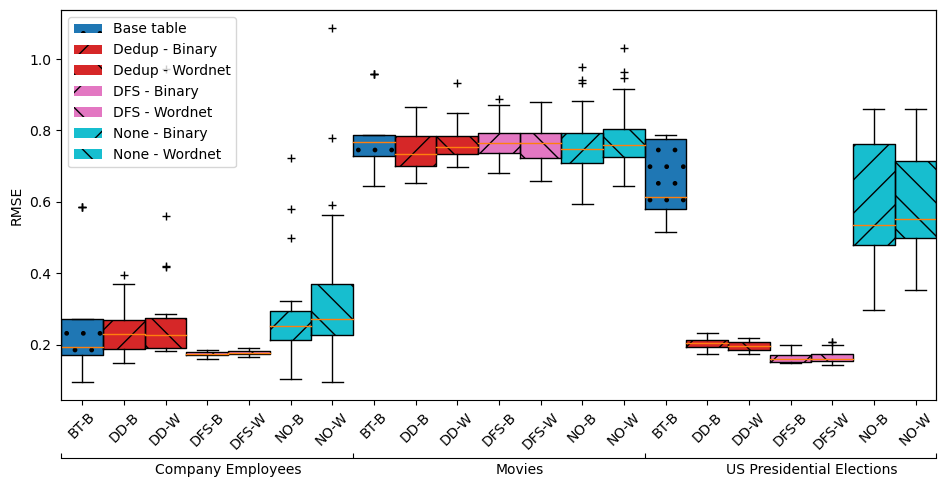

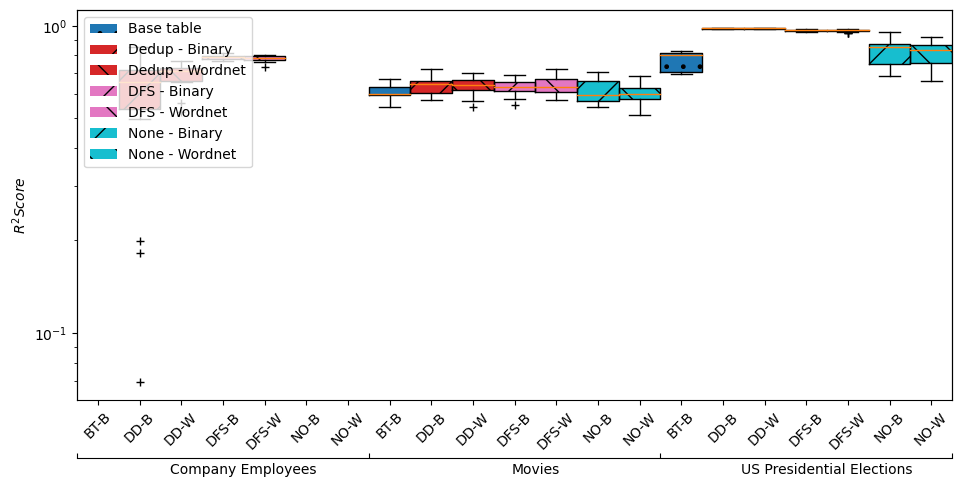

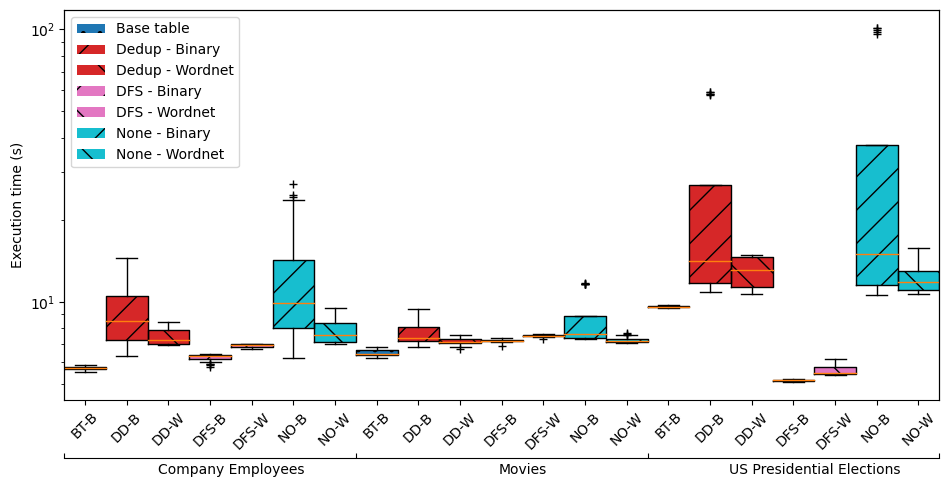

In [29]:
utils.prepare_boxplot(df_p, "rmse", "RMSE", yscale="lin")
utils.prepare_boxplot(df_p, "r2score", "$R^2 Score$", yscale="log")
utils.prepare_boxplot(df_p, "duration", "Execution time (s)", yscale="log")


# Measure containment, compare with actual performance

In [7]:
df = pl.read_csv("results/results.log")

In [8]:
df

scenario_id,status,target_dl,git_hash,index_name,source_table,candidate_table,iterations,join_strategy,aggregation,fold_id,run_start,run_end,duration,join_start,join_end,join_duration,similarity,size_prejoin,size_postjoin,rmse,r2score
i64,str,str,str,str,str,str,i64,str,str,i64,str,str,f64,str,str,str,i64,i64,i64,f64,f64
40,"""SUCCESS""","""wordnet""","""57f426cdf822e8…","""base_table""","""presidential-r…",null,1000,"""left""","""none""",0,"""2023-06-03 00:…","""2023-06-03 00:…",9.630954,null,null,null,null,null,null,0.612838,0.815007
40,"""SUCCESS""","""wordnet""","""57f426cdf822e8…","""base_table""","""presidential-r…",null,1000,"""left""","""none""",1,"""2023-06-03 00:…","""2023-06-03 00:…",9.490498,null,null,null,null,null,null,0.516433,0.824124
40,"""SUCCESS""","""wordnet""","""57f426cdf822e8…","""base_table""","""presidential-r…",null,1000,"""left""","""none""",2,"""2023-06-03 00:…","""2023-06-03 00:…",9.63213,null,null,null,null,null,null,0.57913,0.8038
40,"""SUCCESS""","""wordnet""","""57f426cdf822e8…","""base_table""","""presidential-r…",null,1000,"""left""","""none""",3,"""2023-06-03 00:…","""2023-06-03 00:…",9.580429,null,null,null,null,null,null,0.786311,0.705055
40,"""SUCCESS""","""wordnet""","""57f426cdf822e8…","""base_table""","""presidential-r…",null,1000,"""left""","""none""",4,"""2023-06-03 00:…","""2023-06-03 00:…",9.617486,null,null,null,null,null,null,0.776477,0.695001
40,"""SUCCESS""","""wordnet""","""57f426cdf822e8…","""minhash""","""presidential-r…","""/storage/store…",1000,"""left""","""none""",0,"""2023-06-03 00:…","""2023-06-03 00:…",10.567645,"""2023-06-03 00:…","""2023-06-03 00:…",null,10,22084,22128,0.649208,0.793548
40,"""SUCCESS""","""wordnet""","""57f426cdf822e8…","""minhash""","""presidential-r…","""/storage/store…",1000,"""left""","""none""",1,"""2023-06-03 00:…","""2023-06-03 00:…",10.539022,"""2023-06-03 00:…","""2023-06-03 00:…",null,10,22084,22128,0.453567,0.864248
40,"""SUCCESS""","""wordnet""","""57f426cdf822e8…","""minhash""","""presidential-r…","""/storage/store…",1000,"""left""","""none""",2,"""2023-06-03 00:…","""2023-06-03 00:…",10.506578,"""2023-06-03 00:…","""2023-06-03 00:…",null,10,22084,22128,0.455016,0.87938
40,"""SUCCESS""","""wordnet""","""57f426cdf822e8…","""minhash""","""presidential-r…","""/storage/store…",1000,"""left""","""none""",3,"""2023-06-03 00:…","""2023-06-03 00:…",10.513206,"""2023-06-03 00:…","""2023-06-03 00:…",null,10,22084,22128,0.823458,0.676603


In [9]:
base_tables = {}
for md in Path("data/metadata/queries").glob("*.json"):
    md_dict = json.load(open(md, "r"))
    base_tables[md_dict["df_name"]] = md_dict["full_path"]

In [10]:
md_dict

{'full_path': '/storage/store/work/rcappuzz/ken_datasets/the-movies-dataset/movies-prepared.parquet',
 'hash': '310b7e82655f2beaba69e8b482d43b65',
 'df_name': 'movies-prepared',
 'source_dl': 'queries',
 'license': '',
 'path_metadata': '/storage/store/work/rcappuzz/metadata/queries/310b7e82655f2beaba69e8b482d43b65.json'}

In [11]:
subset = df.select(
    pl.col("source_table"),
    pl.col("candidate_table"),
    pl.col("similarity"),
    pl.col("rmse"),
    pl.col("r2score"),
).unique(["source_table", "candidate_table"]).with_columns(
    pl.col("source_table").map_dict(base_tables)
)

In [12]:
path_candidates = Path("generated_candidates_company-employees-prepared.pickle")
c_full = pickle.load(open(path_candidates, "rb"))
candidates = c_full["minhash"]

In [13]:
list_dict=[]
for c, cand in candidates.items():
    src_md = cand.source_metadata
    cand_md = cand.candidate_metadata
    left_on = cand.left_on
    right_on = cand.right_on
    source_table = pl.read_parquet(src_md["full_path"])
    candidate_table = pl.read_parquet(cand_md["full_path"])
    containment=jp.measure_containment(source_table, candidate_table, left_on, right_on)
    c_dict = {
        "source_table": src_md["full_path"],
        "candidate_table": cand_md["full_path"],
        "similarity": cand.similarity_score,
        "containment": containment
    }
    list_dict.append(c_dict)

In [14]:
stat_containment = pl.from_dicts(list_dict)

In [15]:
joined = stat_containment.join(
    subset, on=["source_table", "candidate_table"]
)

In [16]:
joined

source_table,candidate_table,similarity,containment,similarity_right,rmse,r2score
str,str,i64,f64,i64,f64,f64
"""/storage/store…","""/storage/store…",20,0.128505,20,1.088063,-47.635989
"""/storage/store…","""/storage/store…",20,0.003338,20,0.58127,-2.620841
"""/storage/store…","""/storage/store…",20,0.199599,20,0.5574,-2.45069
"""/storage/store…","""/storage/store…",20,0.001669,20,0.208535,0.725245
"""/storage/store…","""/storage/store…",20,0.002003,20,0.629346,-3.197312
"""/storage/store…","""/storage/store…",20,0.036048,20,0.580891,-2.603119
"""/storage/store…","""/storage/store…",20,0.20761,20,0.59079,-2.639365
"""/storage/store…","""/storage/store…",20,0.223965,20,0.779501,-5.5104
"""/storage/store…","""/storage/store…",20,0.003004,20,0.587007,-2.678805


In [17]:
cont_rmse = joined.select(
    pl.col("containment"),
    pl.col("rmse")
).to_pandas()

<Axes: xlabel='containment', ylabel='rmse'>

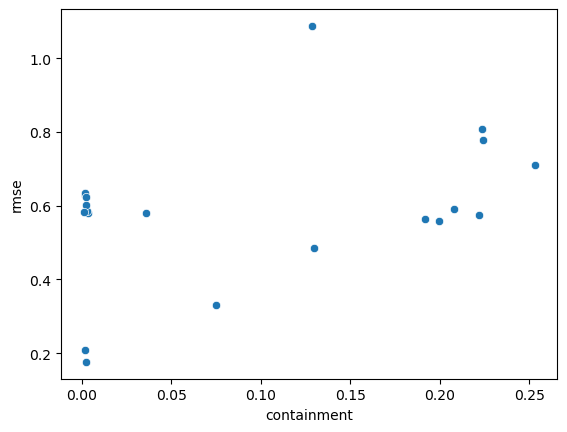

In [18]:
sns.scatterplot(data=cont_rmse, x="containment", y="rmse")

# Pre-join post-join sizes

In [38]:
df = pl.read_csv("results/results_1000iter.log")


In [39]:
df.filter(
    (pl.col("index_name") != "base_table") & (pl.col("aggregation") == "none")
).select(
    pl.col("source_table"),
    pl.col("size_prejoin"),
    pl.col("size_postjoin"),
    pl.col("target_dl")
).groupby(
    pl.col("target_dl"),
    pl.col("source_table")
).agg(
    pl.avg("size_prejoin").alias("avg_prejoin"),
    pl.avg("size_postjoin").alias("avg_postjoin"),
    pl.max("size_postjoin").alias("max_postjoin"),
).with_columns(
    (pl.col("avg_postjoin")/pl.col("avg_prejoin")).alias("scale_factor_avg")
)

target_dl,source_table,avg_prejoin,avg_postjoin,max_postjoin,scale_factor_avg
str,str,f64,f64,i64,f64
"""binary""","""presidential-r…",22084.0,136464.0,406155,6.179315
"""wordnet""","""company-employ…",3107.0,6096.0,11030,1.962021
"""wordnet""","""movies-prepare…",3853.0,4212.5,5095,1.093304
"""binary""","""movies-prepare…",3853.0,8688.75,19688,2.255061
"""binary""","""company-employ…",3107.0,26565.5,72163,8.550209
"""wordnet""","""presidential-r…",22084.0,30295.75,51969,1.371842


In [45]:
df.filter(
    (pl.col("index_name") != "base_table") & (pl.col("aggregation") == "none")
).select(
    pl.col("source_table"),
    pl.col("size_prejoin"),
    pl.col("size_postjoin"),
    pl.col("target_dl")
).with_columns(
    (pl.col("size_postjoin")/pl.col("size_prejoin")).alias("scale_factor")
).groupby(
    pl.col("target_dl"),
    pl.col("source_table")
).agg(
    pl.avg("size_prejoin").alias("avg_prejoin"),
    pl.avg("size_postjoin").alias("avg_postjoin"),
    pl.max("size_postjoin").alias("max_postjoin"),  
    pl.avg("scale_factor").alias("avg_scalefactor"),
    pl.max("scale_factor").alias("max_scalefactor"),  
).sort(
    pl.col("source_table"),
    pl.col("target_dl"),
)

target_dl,source_table,avg_prejoin,avg_postjoin,max_postjoin,avg_scalefactor,max_scalefactor
str,str,f64,f64,i64,f64,f64
"""binary""","""company-employ…",3107.0,26565.5,72163,8.550209,23.225941
"""wordnet""","""company-employ…",3107.0,6096.0,11030,1.962021,3.550048
"""binary""","""movies-prepare…",3853.0,8688.75,19688,2.255061,5.109785
"""wordnet""","""movies-prepare…",3853.0,4212.5,5095,1.093304,1.322346
"""binary""","""presidential-r…",22084.0,136464.0,406155,6.179315,18.391369
"""wordnet""","""presidential-r…",22084.0,30295.75,51969,1.371842,2.353242
